In [23]:
library(stringr)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
save1 <- read.table('../Data/주민등록인구.txt',fileEncoding = 'utf-8',header = T)

In [7]:
head(save1)
tail(save1)

기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,X65세이상고령자
기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2016.1/4,합계,"4,194,485","10,282,821","5,053,675","5,229,146","10,009,588","4,922,103","5,087,485","273,233","131,572","141,661",2.39,"1,280,268"
2016.1/4,종로구,"73,146","163,993","80,548","83,445","155,142","76,593","78,549","8,851","3,955","4,896",2.12,"24,999"
2016.1/4,중구,"59,339","134,436","66,747","67,689","125,765","62,653","63,112","8,671","4,094","4,577",2.12,"20,431"
2016.1/4,용산구,"107,342","247,297","120,607","126,690","232,684","112,719","119,965","14,613","7,888","6,725",2.17,"35,912"


,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,X65세이상고령자
517,2020.4/4,동작구,"184,229","401,572","193,718","207,854","391,220","189,152","202,068","10,352","4,566","5,786",2.12,"65,190"
518,2020.4/4,관악구,"274,811","509,803","255,211","254,592","495,060","248,339","246,721","14,743","6,872","7,871",1.8,"78,875"
519,2020.4/4,서초구,"173,502","429,025","205,282","223,743","425,126","203,359","221,767","3,899","1,923","1,976",2.45,"60,169"
520,2020.4/4,강남구,"234,872","544,055","260,378","283,677","539,231","257,999","281,232","4,824","2,379","2,445",2.3,"75,096"
521,2020.4/4,송파구,"281,959","673,926","325,080","348,846","667,960","322,299","345,661","5,966","2,781","3,185",2.37,"93,483"
522,2020.4/4,강동구,"196,499","463,998","228,044","235,954","459,970","226,216","233,754","4,028","1,828","2,200",2.34,"70,019"


In [10]:
save2 <- save1[-c(1:2),c(1:2,4:6)]

In [11]:
colnames(save2) <- c('기간','자치구','총인구','남성','여성')

In [12]:
head(save2)

,기간,자치구,총인구,남성,여성
3,2016.1/4,합계,"10,282,821","5,053,675","5,229,146"
4,2016.1/4,종로구,"163,993","80,548","83,445"
5,2016.1/4,중구,"134,436","66,747","67,689"
6,2016.1/4,용산구,"247,297","120,607","126,690"
7,2016.1/4,성동구,"304,565","151,019","153,546"
8,2016.1/4,광진구,"374,798","182,951","191,847"


In [19]:
save3 <- save2[rownames(subset(save2,자치구!='합계')),]

In [20]:
head(save3)

,기간,자치구,총인구,남성,여성
4,2016.1/4,종로구,"163,993","80,548","83,445"
5,2016.1/4,중구,"134,436","66,747","67,689"
6,2016.1/4,용산구,"247,297","120,607","126,690"
7,2016.1/4,성동구,"304,565","151,019","153,546"
8,2016.1/4,광진구,"374,798","182,951","191,847"
9,2016.1/4,동대문구,"373,657","185,627","188,030"


In [21]:
rownames(save3)<- c()

In [24]:
for (i in 3: ncol(save3)){ 
    save3[,i] <- as.numeric(str_replace_all(as.character(save3[,i]),',',''))

}

In [25]:
str(save3)

'data.frame':	500 obs. of  5 variables:
 $ 기간  : Factor w/ 21 levels "2016.1/4","2016.2/4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ 자치구: Factor w/ 27 levels "강남구","강동구",..: 24 25 21 16 6 11 26 17 3 10 ...
 $ 총인구: num  163993 134436 247297 304565 374798 ...
 $ 남성  : num  80548 66747 120607 151019 182951 ...
 $ 여성  : num  83445 67689 126690 153546 191847 ...


In [28]:
for (i in 1:2){ 
    save3[,i] <- factor(save3[,i])
}

In [29]:
str(save3)

'data.frame':	500 obs. of  5 variables:
 $ 기간  : Factor w/ 20 levels "2016.1/4","2016.2/4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ 자치구: Factor w/ 25 levels "강남구","강동구",..: 23 24 21 16 6 11 25 17 3 10 ...
 $ 총인구: num  163993 134436 247297 304565 374798 ...
 $ 남성  : num  80548 66747 120607 151019 182951 ...
 $ 여성  : num  83445 67689 126690 153546 191847 ...


In [33]:
head(arrange(save3,기간,desc(총인구)))
head(arrange(save3,기간,총인구))

기간,자치구,총인구,남성,여성
2016.1/4,송파구,663904,324076,339828
2016.1/4,강서구,597473,291883,305590
2016.1/4,강남구,578862,277575,301287
2016.1/4,노원구,577805,281431,296374
2016.1/4,관악구,530072,267390,262682
2016.1/4,은평구,501242,244103,257139


기간,자치구,총인구,남성,여성
2016.1/4,중구,134436,66747,67689
2016.1/4,종로구,163993,80548,83445
2016.1/4,용산구,247297,120607,126690
2016.1/4,금천구,255274,130794,124480
2016.1/4,성동구,304565,151019,153546
2016.1/4,서대문구,326746,157763,168983


기간,자치구,총인구,남성,여성
2016.1/4,중구,134436,66747,67689
2016.1/4,송파구,663904,324076,339828
2016.2/4,중구,134175,66582,67593
2016.2/4,송파구,662605,323355,339250
2016.3/4,중구,134463,66701,67762
2016.3/4,송파구,662413,323007,339406


,기간,자치구,총인구,남성,여성
35,2020.2/4,중구,136030,66545,69485
36,2020.2/4,송파구,678067,327383,350684
37,2020.3/4,중구,135321,66193,69128
38,2020.3/4,송파구,676673,326602,350071
39,2020.4/4,중구,134635,65776,68859
40,2020.4/4,송파구,673926,325080,348846


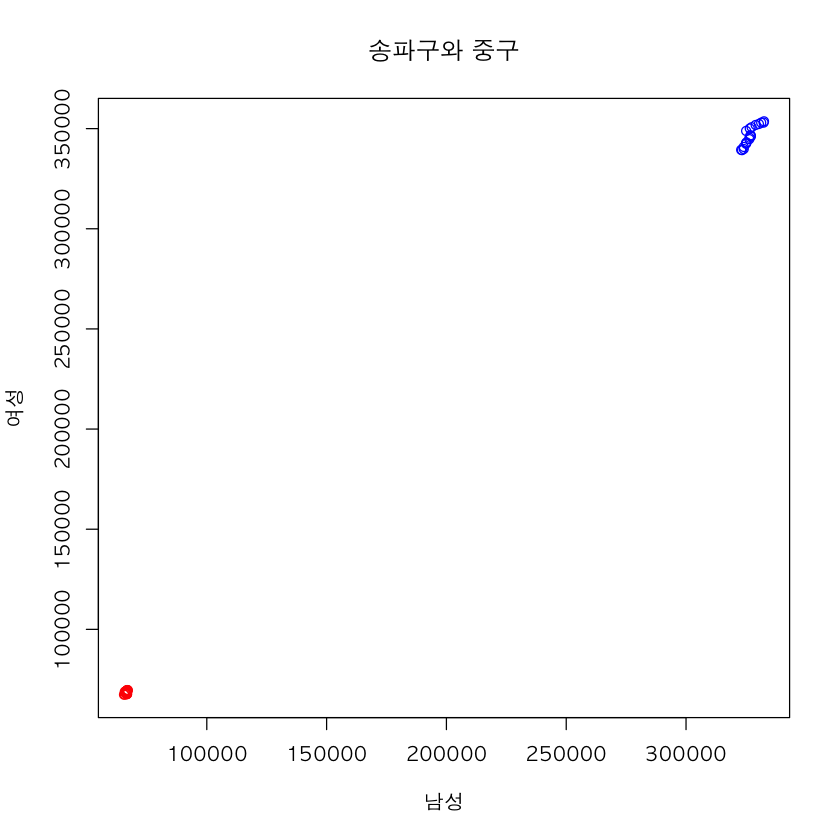

In [39]:
seoul.double <- subset(save3,자치구 == "중구" | 자치구 == "송파구")
rownames(seoul.double) <- c()
head(seoul.double)
tail(seoul.double)
# for mac
options(warn = -1)
par(family = "AppleGothic")

# 지수 없애기
options(scipen = 100)
plot(seoul.double$남성,seoul.double$여성,
#     xlim = c(0,400),
#     ylim = c(0,600),
     col = ifelse(seoul.double$총인구 >= 500000,'blue','red'),
     xlab = "남성",
     ylab = "여성",
     main = "송파구와 중구",
    )

In [41]:
save4 <- arrange(save3,기간,자치구)

In [43]:
save4$기간<-substring(save4$기간,1,4)

In [44]:
temp <- c()
cul <- c()
for(i in 2016:2020){
    총인구<-aggregate(총인구 ~ 자치구, data = subset(save4,기간==i),sum)
    여성<-aggregate(여성 ~ 자치구, data = subset(save4,기간==i),sum)[,2]
    남성<-aggregate(남성 ~ 자치구, data = subset(save4,기간==i),sum)[,2]
    cul<-cbind('기간'=i,총인구,여성,남성)
    temp <- rbind(temp,cul)
}
head(temp)
tail(temp)
save5<-temp

기간,자치구,총인구,여성,남성
2016,강남구,2302389,1198792,1103597
2016,강동구,1815964,912204,903760
2016,강북구,1329172,676952,652220
2016,강서구,2397378,1227021,1170357
2016,관악구,2113120,1047205,1065915
2016,광진구,1494635,765831,728804


,기간,자치구,총인구,여성,남성
120,2020,영등포구,1623269,812411,810858
121,2020,용산구,981125,503761,477364
122,2020,은평구,1936332,1006854,929478
123,2020,종로구,641342,331059,310283
124,2020,중구,542455,277172,265283
125,2020,중랑구,1600644,810008,790636


In [45]:
head(arrange(save5,기간,desc(총인구)))
head(arrange(save5,기간,총인구))

기간,자치구,총인구,여성,남성
2016,송파구,2653868,1359343,1294525
2016,강서구,2397378,1227021,1170357
2016,강남구,2302389,1198792,1103597
2016,노원구,2300297,1180701,1119596
2016,관악구,2113120,1047205,1065915
2016,은평구,1995543,1024655,970888


기간,자치구,총인구,여성,남성
2016,중구,537483,271001,266482
2016,종로구,652107,332272,319835
2016,용산구,985650,504651,480999
2016,금천구,1018257,496642,521615
2016,성동구,1222757,616937,605820
2016,서대문구,1306089,677076,629013


In [46]:
write.csv(save3,"../Data/주민등록인구_거주자인구_분기별.csv",row.names=F)
write.csv(save5,"../Data/주민등록인구_거주자인구_연별.csv",row.names=F)